In [1]:
! pip install tensorflow_addons

  Using cached tensorflow_addons-0.21.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (612 kB)
  Using cached typeguard-2.13.3-py3-none-any.whl (17 kB)


In [2]:
#Imports and settings

import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import sys

import tensorflow as tf
import tensorflow_addons as tfa
from tqdm.notebook import tqdm


from sklearn.model_selection import train_test_split

np.set_printoptions(suppress=True)

/opt/conda/lib/python3.8/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
/opt/conda/lib/python3.8/site-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.11.0 and strictly below 2.14.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.8.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're usin

In [3]:
# load the features and labels (subtract 1 as the labels aren't indexed from 0)
ytest = np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/test/y_test.txt')-1
ytrain = np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/train/y_train.txt')-1

print(ytrain.shape)
print(ytest.shape)

(7352,)
(2947,)


In [4]:
# load the x,y,z accelerations for the three data streams for each coordinate - test
xx=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/test/Inertial Signals/body_acc_x_test.txt')
yy=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/test/Inertial Signals/body_acc_y_test.txt')
zz=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/test/Inertial Signals/body_acc_z_test.txt')
xxt=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/test/Inertial Signals/total_acc_x_test.txt')
yyt=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/test/Inertial Signals/total_acc_y_test.txt')
zzt=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/test/Inertial Signals/total_acc_z_test.txt')
xxg=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/test/Inertial Signals/body_gyro_x_test.txt')
yyg=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/test/Inertial Signals/body_gyro_y_test.txt')
zzg=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/test/Inertial Signals/body_gyro_z_test.txt')
print(xx.shape)
print(xxg.shape)

(2947, 128)
(2947, 128)


In [5]:
# concatenate into a single (n,128,9) array
xtest = np.concatenate((xx[:,:,None],yy[:,:,None],zz[:,:,None],
                        xxt[:,:,None],yyt[:,:,None],zzt[:,:,None],
                        xxg[:,:,None],yyg[:,:,None],zzg[:,:,None]),axis=2)
print(xtest.shape)

(2947, 128, 9)


In [6]:
# load the x,y,z accelerations for the three data streams for each coordinate - train

xx_t=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/train/Inertial Signals/body_acc_x_train.txt')
yy_t=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/train/Inertial Signals/body_acc_y_train.txt')
zz_t=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/train/Inertial Signals/body_acc_z_train.txt')
xxt_t=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/train/Inertial Signals/total_acc_x_train.txt')
yyt_t=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/train/Inertial Signals/total_acc_y_train.txt')
zzt_t=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/train/Inertial Signals/total_acc_z_train.txt')
xxg_t=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/train/Inertial Signals/body_gyro_x_train.txt')
yyg_t=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/train/Inertial Signals/body_gyro_y_train.txt')
zzg_t=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/train/Inertial Signals/body_gyro_z_train.txt')

In [7]:
# concatenate into a single (n,128,9) array
xtrain = np.concatenate((xx_t[:,:,None],yy_t[:,:,None],zz_t[:,:,None],
                        xxt_t[:,:,None],yyt_t[:,:,None],zzt_t[:,:,None],
                        xxg_t[:,:,None],yyg_t[:,:,None],zzg_t[:,:,None]),axis=2)

In [8]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(7352, 128, 9)
(7352,)
(2947, 128, 9)
(2947,)


In [9]:
x_input, x_val, y_input, y_val = train_test_split(xtrain, ytrain, test_size=0.2, random_state=10)

#one-hot encoding for labels
y_input = tf.keras.utils.to_categorical(y_input)
y_val = tf.keras.utils.to_categorical(y_val)

x_input = tf.convert_to_tensor(x_input, tf.float32)
x_val = tf.convert_to_tensor(x_val, tf.float32)
y_input = tf.convert_to_tensor(y_input, tf.float32)
y_val = tf.convert_to_tensor(y_val, tf.float32)
print(x_val.shape)
print(xtest.shape)
print(y_input.shape)
print(y_val.shape)

(1471, 128, 9)
(2947, 128, 9)
(5881, 6)
(1471, 6)


2023-07-20 16:57:11.868017: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-20 16:57:12.438848: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10794 MB memory:  -> device: 0, name: Tesla K80, pci bus id: 0001:00:00.0, compute capability: 3.7


# Part 3
### Using the best architecture from part 2, we have extra dimensions

In [10]:
#tensorboad set up
logdir = '/home/jovyan/logs/Project/Part3'

In [11]:
# Keras API model

#We create the input layer and combine with further dense layers,
input_layer = tf.keras.Input(shape=(128, 9))
output_layer = tf.keras.layers.Conv1D(filters=128, kernel_size=16)(input_layer)
output_layer = tf.keras.layers.BatchNormalization()(output_layer)
output_layer = tf.keras.layers.Dense(64, activation='relu')(output_layer)
output_layer = tf.keras.layers.GlobalAveragePooling1D()(output_layer)

# # Add a softmax layer with  output units:
output_layer = tf.keras.layers.Dense(6, activation='softmax')(output_layer)

model = tf.keras.Model(inputs=input_layer,outputs=output_layer)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 9)]          0         
                                                                 
 conv1d (Conv1D)             (None, 113, 128)          18560     
                                                                 
 batch_normalization (BatchN  (None, 113, 128)         512       
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 113, 64)           8256      
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense_1 (Dense)             (None, 6)                 390   

In [12]:
# Compile model

# Callbacks
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
# create a callback that will stop training if the validation loss hasn't improved for 2 epochs
early_stopping_callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30)]
# initialize tqdm callback with default parameters
tqdm_callback = tfa.callbacks.TQDMProgressBar()


#The compilation and training then proceeds as per the sequential model,
model.compile(optimizer=tf.keras.optimizers.Adam(0.0001),
        loss='categorical_crossentropy', metrics=['accuracy'])


In [13]:
model.fit(x_input, y_input, 
          epochs=500, 
          batch_size=128,
          validation_data=(x_val, y_val),
          callbacks=[tensorboard_callback, tqdm_callback, early_stopping_callbacks]
         )

Training:   0%|           0/500 ETA: ?s,  ?epochs/s

Epoch 1/500


0/46           ETA: ?s - 

Epoch 1/500


2023-07-20 16:57:37.169616: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8100
2023-07-20 16:57:37.398191: W tensorflow/stream_executor/gpu/asm_compiler.cc:230] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 3.7
2023-07-20 16:57:37.398223: W tensorflow/stream_executor/gpu/asm_compiler.cc:233] Used ptxas at ptxas
2023-07-20 16:57:37.398289: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] UNIMPLEMENTED: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


46/46 [==============================] - 3s 22ms/step - loss: 1.3361 - accuracy: 0.4764 - val_loss: 1.6362 - val_accuracy: 0.6771
Epoch 2/500


0/46           ETA: ?s - 

Epoch 2/500
46/46 [==============================] - 0s 10ms/step - loss: 0.8418 - accuracy: 0.8590 - val_loss: 1.5056 - val_accuracy: 0.6397
Epoch 3/500


0/46           ETA: ?s - 

Epoch 3/500
46/46 [==============================] - 0s 11ms/step - loss: 0.6277 - accuracy: 0.9075 - val_loss: 1.3456 - val_accuracy: 0.6567
Epoch 4/500


0/46           ETA: ?s - 

Epoch 4/500
46/46 [==============================] - 0s 10ms/step - loss: 0.4980 - accuracy: 0.9189 - val_loss: 1.1603 - val_accuracy: 0.7729
Epoch 5/500


0/46           ETA: ?s - 

Epoch 5/500
46/46 [==============================] - 0s 10ms/step - loss: 0.4121 - accuracy: 0.9279 - val_loss: 0.9777 - val_accuracy: 0.8273
Epoch 6/500


0/46           ETA: ?s - 

Epoch 6/500
46/46 [==============================] - 0s 10ms/step - loss: 0.3532 - accuracy: 0.9344 - val_loss: 0.8021 - val_accuracy: 0.8552
Epoch 7/500


0/46           ETA: ?s - 

Epoch 7/500
46/46 [==============================] - 0s 10ms/step - loss: 0.3143 - accuracy: 0.9345 - val_loss: 0.6378 - val_accuracy: 0.9028
Epoch 8/500


0/46           ETA: ?s - 

Epoch 8/500
46/46 [==============================] - 0s 10ms/step - loss: 0.2822 - accuracy: 0.9390 - val_loss: 0.5082 - val_accuracy: 0.9116
Epoch 9/500


0/46           ETA: ?s - 

Epoch 9/500
46/46 [==============================] - 0s 10ms/step - loss: 0.2629 - accuracy: 0.9410 - val_loss: 0.4007 - val_accuracy: 0.9293
Epoch 10/500


0/46           ETA: ?s - 

Epoch 10/500
46/46 [==============================] - 0s 10ms/step - loss: 0.2404 - accuracy: 0.9412 - val_loss: 0.3272 - val_accuracy: 0.9307
Epoch 11/500


0/46           ETA: ?s - 

Epoch 11/500
46/46 [==============================] - 0s 10ms/step - loss: 0.2257 - accuracy: 0.9430 - val_loss: 0.2782 - val_accuracy: 0.9463
Epoch 12/500


0/46           ETA: ?s - 

Epoch 12/500
46/46 [==============================] - 0s 10ms/step - loss: 0.2176 - accuracy: 0.9442 - val_loss: 0.2381 - val_accuracy: 0.9443
Epoch 13/500


0/46           ETA: ?s - 

Epoch 13/500
46/46 [==============================] - 0s 11ms/step - loss: 0.2066 - accuracy: 0.9452 - val_loss: 0.2143 - val_accuracy: 0.9436
Epoch 14/500


0/46           ETA: ?s - 

Epoch 14/500
46/46 [==============================] - 0s 10ms/step - loss: 0.1992 - accuracy: 0.9447 - val_loss: 0.2132 - val_accuracy: 0.9490
Epoch 15/500


0/46           ETA: ?s - 

Epoch 15/500
46/46 [==============================] - 0s 10ms/step - loss: 0.1896 - accuracy: 0.9469 - val_loss: 0.1874 - val_accuracy: 0.9463
Epoch 16/500


0/46           ETA: ?s - 

Epoch 16/500
46/46 [==============================] - 0s 10ms/step - loss: 0.1815 - accuracy: 0.9490 - val_loss: 0.1785 - val_accuracy: 0.9443
Epoch 17/500


0/46           ETA: ?s - 

Epoch 17/500
46/46 [==============================] - 0s 10ms/step - loss: 0.1734 - accuracy: 0.9469 - val_loss: 0.1777 - val_accuracy: 0.9558
Epoch 18/500


0/46           ETA: ?s - 

Epoch 18/500
46/46 [==============================] - 0s 10ms/step - loss: 0.1692 - accuracy: 0.9503 - val_loss: 0.1656 - val_accuracy: 0.9463
Epoch 19/500


0/46           ETA: ?s - 

Epoch 19/500
46/46 [==============================] - 0s 10ms/step - loss: 0.1657 - accuracy: 0.9483 - val_loss: 0.1760 - val_accuracy: 0.9531
Epoch 20/500


0/46           ETA: ?s - 

Epoch 20/500
46/46 [==============================] - 0s 10ms/step - loss: 0.1630 - accuracy: 0.9510 - val_loss: 0.1572 - val_accuracy: 0.9477
Epoch 21/500


0/46           ETA: ?s - 

Epoch 21/500
46/46 [==============================] - 0s 10ms/step - loss: 0.1626 - accuracy: 0.9464 - val_loss: 0.1563 - val_accuracy: 0.9585
Epoch 22/500


0/46           ETA: ?s - 

Epoch 22/500
46/46 [==============================] - 0s 10ms/step - loss: 0.1551 - accuracy: 0.9524 - val_loss: 0.1494 - val_accuracy: 0.9511
Epoch 23/500


0/46           ETA: ?s - 

Epoch 23/500
46/46 [==============================] - 0s 10ms/step - loss: 0.1527 - accuracy: 0.9546 - val_loss: 0.1463 - val_accuracy: 0.9511
Epoch 24/500


0/46           ETA: ?s - 

Epoch 24/500
46/46 [==============================] - 0s 10ms/step - loss: 0.1506 - accuracy: 0.9510 - val_loss: 0.1551 - val_accuracy: 0.9545
Epoch 25/500


0/46           ETA: ?s - 

Epoch 25/500
46/46 [==============================] - 0s 11ms/step - loss: 0.1483 - accuracy: 0.9527 - val_loss: 0.1420 - val_accuracy: 0.9504
Epoch 26/500


0/46           ETA: ?s - 

Epoch 26/500
46/46 [==============================] - 0s 10ms/step - loss: 0.1432 - accuracy: 0.9514 - val_loss: 0.1389 - val_accuracy: 0.9558
Epoch 27/500


0/46           ETA: ?s - 

Epoch 27/500
46/46 [==============================] - 0s 10ms/step - loss: 0.1415 - accuracy: 0.9549 - val_loss: 0.1391 - val_accuracy: 0.9531
Epoch 28/500


0/46           ETA: ?s - 

Epoch 28/500
46/46 [==============================] - 0s 10ms/step - loss: 0.1373 - accuracy: 0.9537 - val_loss: 0.1369 - val_accuracy: 0.9551
Epoch 29/500


0/46           ETA: ?s - 

Epoch 29/500
46/46 [==============================] - 0s 10ms/step - loss: 0.1386 - accuracy: 0.9537 - val_loss: 0.1347 - val_accuracy: 0.9524
Epoch 30/500


0/46           ETA: ?s - 

Epoch 30/500
46/46 [==============================] - 0s 10ms/step - loss: 0.1346 - accuracy: 0.9537 - val_loss: 0.1323 - val_accuracy: 0.9538
Epoch 31/500


0/46           ETA: ?s - 

Epoch 31/500
46/46 [==============================] - 0s 10ms/step - loss: 0.1351 - accuracy: 0.9543 - val_loss: 0.1309 - val_accuracy: 0.9538
Epoch 32/500


0/46           ETA: ?s - 

Epoch 32/500
46/46 [==============================] - 0s 10ms/step - loss: 0.1300 - accuracy: 0.9548 - val_loss: 0.1322 - val_accuracy: 0.9531
Epoch 33/500


0/46           ETA: ?s - 

Epoch 33/500
46/46 [==============================] - 0s 10ms/step - loss: 0.1312 - accuracy: 0.9526 - val_loss: 0.1350 - val_accuracy: 0.9545
Epoch 34/500


0/46           ETA: ?s - 

Epoch 34/500
46/46 [==============================] - 0s 10ms/step - loss: 0.1332 - accuracy: 0.9520 - val_loss: 0.1285 - val_accuracy: 0.9517
Epoch 35/500


0/46           ETA: ?s - 

Epoch 35/500
46/46 [==============================] - 0s 10ms/step - loss: 0.1267 - accuracy: 0.9560 - val_loss: 0.1276 - val_accuracy: 0.9504
Epoch 36/500


0/46           ETA: ?s - 

Epoch 36/500
46/46 [==============================] - 0s 10ms/step - loss: 0.1273 - accuracy: 0.9543 - val_loss: 0.1239 - val_accuracy: 0.9524
Epoch 37/500


0/46           ETA: ?s - 

Epoch 37/500
46/46 [==============================] - 0s 10ms/step - loss: 0.1259 - accuracy: 0.9526 - val_loss: 0.1232 - val_accuracy: 0.9538
Epoch 38/500


0/46           ETA: ?s - 

Epoch 38/500
46/46 [==============================] - 0s 10ms/step - loss: 0.1246 - accuracy: 0.9565 - val_loss: 0.1228 - val_accuracy: 0.9558
Epoch 39/500


0/46           ETA: ?s - 

Epoch 39/500
46/46 [==============================] - 0s 10ms/step - loss: 0.1262 - accuracy: 0.9536 - val_loss: 0.1241 - val_accuracy: 0.9551
Epoch 40/500


0/46           ETA: ?s - 

Epoch 40/500
46/46 [==============================] - 0s 10ms/step - loss: 0.1228 - accuracy: 0.9539 - val_loss: 0.1215 - val_accuracy: 0.9545
Epoch 41/500


0/46           ETA: ?s - 

Epoch 41/500
46/46 [==============================] - 0s 10ms/step - loss: 0.1242 - accuracy: 0.9536 - val_loss: 0.1221 - val_accuracy: 0.9538
Epoch 42/500


0/46           ETA: ?s - 

Epoch 42/500
46/46 [==============================] - 0s 10ms/step - loss: 0.1181 - accuracy: 0.9546 - val_loss: 0.1196 - val_accuracy: 0.9538
Epoch 43/500


0/46           ETA: ?s - 

Epoch 43/500
46/46 [==============================] - 0s 10ms/step - loss: 0.1199 - accuracy: 0.9551 - val_loss: 0.1203 - val_accuracy: 0.9545
Epoch 44/500


0/46           ETA: ?s - 

Epoch 44/500
46/46 [==============================] - 0s 10ms/step - loss: 0.1195 - accuracy: 0.9553 - val_loss: 0.1193 - val_accuracy: 0.9511
Epoch 45/500


0/46           ETA: ?s - 

Epoch 45/500
46/46 [==============================] - 0s 10ms/step - loss: 0.1196 - accuracy: 0.9529 - val_loss: 0.1203 - val_accuracy: 0.9565
Epoch 46/500


0/46           ETA: ?s - 

Epoch 46/500
46/46 [==============================] - 0s 10ms/step - loss: 0.1173 - accuracy: 0.9537 - val_loss: 0.1158 - val_accuracy: 0.9551
Epoch 47/500


0/46           ETA: ?s - 

Epoch 47/500
46/46 [==============================] - 0s 10ms/step - loss: 0.1162 - accuracy: 0.9549 - val_loss: 0.1153 - val_accuracy: 0.9558
Epoch 48/500


0/46           ETA: ?s - 

Epoch 48/500
46/46 [==============================] - 0s 10ms/step - loss: 0.1141 - accuracy: 0.9565 - val_loss: 0.1144 - val_accuracy: 0.9565
Epoch 49/500


0/46           ETA: ?s - 

Epoch 49/500
46/46 [==============================] - 0s 10ms/step - loss: 0.1147 - accuracy: 0.9561 - val_loss: 0.1138 - val_accuracy: 0.9545
Epoch 50/500


0/46           ETA: ?s - 

Epoch 50/500
46/46 [==============================] - 0s 10ms/step - loss: 0.1129 - accuracy: 0.9556 - val_loss: 0.1178 - val_accuracy: 0.9565
Epoch 51/500


0/46           ETA: ?s - 

Epoch 51/500
46/46 [==============================] - 0s 9ms/step - loss: 0.1133 - accuracy: 0.9556 - val_loss: 0.1151 - val_accuracy: 0.9531
Epoch 52/500


0/46           ETA: ?s - 

Epoch 52/500
46/46 [==============================] - 0s 10ms/step - loss: 0.1125 - accuracy: 0.9551 - val_loss: 0.1130 - val_accuracy: 0.9558
Epoch 53/500


0/46           ETA: ?s - 

Epoch 53/500
46/46 [==============================] - 0s 10ms/step - loss: 0.1143 - accuracy: 0.9575 - val_loss: 0.1168 - val_accuracy: 0.9558
Epoch 54/500


0/46           ETA: ?s - 

Epoch 54/500
46/46 [==============================] - 0s 10ms/step - loss: 0.1120 - accuracy: 0.9575 - val_loss: 0.1130 - val_accuracy: 0.9572
Epoch 55/500


0/46           ETA: ?s - 

Epoch 55/500
46/46 [==============================] - 0s 10ms/step - loss: 0.1107 - accuracy: 0.9563 - val_loss: 0.1129 - val_accuracy: 0.9572
Epoch 56/500


0/46           ETA: ?s - 

Epoch 56/500
46/46 [==============================] - 0s 9ms/step - loss: 0.1097 - accuracy: 0.9553 - val_loss: 0.1118 - val_accuracy: 0.9551
Epoch 57/500


0/46           ETA: ?s - 

Epoch 57/500
46/46 [==============================] - 0s 9ms/step - loss: 0.1101 - accuracy: 0.9554 - val_loss: 0.1112 - val_accuracy: 0.9572
Epoch 58/500


0/46           ETA: ?s - 

Epoch 58/500
46/46 [==============================] - 0s 9ms/step - loss: 0.1099 - accuracy: 0.9556 - val_loss: 0.1100 - val_accuracy: 0.9558
Epoch 59/500


0/46           ETA: ?s - 

Epoch 59/500
46/46 [==============================] - 0s 9ms/step - loss: 0.1073 - accuracy: 0.9568 - val_loss: 0.1185 - val_accuracy: 0.9497
Epoch 60/500


0/46           ETA: ?s - 

Epoch 60/500
46/46 [==============================] - 0s 10ms/step - loss: 0.1060 - accuracy: 0.9554 - val_loss: 0.1311 - val_accuracy: 0.9470
Epoch 61/500


0/46           ETA: ?s - 

Epoch 61/500
46/46 [==============================] - 0s 9ms/step - loss: 0.1087 - accuracy: 0.9566 - val_loss: 0.1138 - val_accuracy: 0.9565
Epoch 62/500


0/46           ETA: ?s - 

Epoch 62/500
46/46 [==============================] - 0s 10ms/step - loss: 0.1072 - accuracy: 0.9568 - val_loss: 0.1102 - val_accuracy: 0.9579
Epoch 63/500


0/46           ETA: ?s - 

Epoch 63/500
46/46 [==============================] - 0s 10ms/step - loss: 0.1067 - accuracy: 0.9570 - val_loss: 0.1090 - val_accuracy: 0.9585
Epoch 64/500


0/46           ETA: ?s - 

Epoch 64/500
46/46 [==============================] - 0s 10ms/step - loss: 0.1095 - accuracy: 0.9561 - val_loss: 0.1170 - val_accuracy: 0.9524
Epoch 65/500


0/46           ETA: ?s - 

Epoch 65/500
46/46 [==============================] - 0s 10ms/step - loss: 0.1063 - accuracy: 0.9572 - val_loss: 0.1119 - val_accuracy: 0.9579
Epoch 66/500


0/46           ETA: ?s - 

Epoch 66/500
46/46 [==============================] - 0s 10ms/step - loss: 0.1059 - accuracy: 0.9585 - val_loss: 0.1281 - val_accuracy: 0.9477
Epoch 67/500


0/46           ETA: ?s - 

Epoch 67/500
46/46 [==============================] - 0s 10ms/step - loss: 0.1049 - accuracy: 0.9572 - val_loss: 0.1074 - val_accuracy: 0.9558
Epoch 68/500


0/46           ETA: ?s - 

Epoch 68/500
46/46 [==============================] - 0s 10ms/step - loss: 0.1051 - accuracy: 0.9565 - val_loss: 0.1080 - val_accuracy: 0.9545
Epoch 69/500


0/46           ETA: ?s - 

Epoch 69/500
46/46 [==============================] - 0s 10ms/step - loss: 0.1048 - accuracy: 0.9556 - val_loss: 0.1068 - val_accuracy: 0.9524
Epoch 70/500


0/46           ETA: ?s - 

Epoch 70/500
46/46 [==============================] - 0s 10ms/step - loss: 0.1046 - accuracy: 0.9560 - val_loss: 0.1066 - val_accuracy: 0.9545
Epoch 71/500


0/46           ETA: ?s - 

Epoch 71/500
46/46 [==============================] - 0s 10ms/step - loss: 0.1049 - accuracy: 0.9554 - val_loss: 0.1063 - val_accuracy: 0.9538
Epoch 72/500


0/46           ETA: ?s - 

Epoch 72/500
46/46 [==============================] - 0s 10ms/step - loss: 0.1027 - accuracy: 0.9575 - val_loss: 0.1051 - val_accuracy: 0.9545
Epoch 73/500


0/46           ETA: ?s - 

Epoch 73/500
46/46 [==============================] - 0s 9ms/step - loss: 0.1038 - accuracy: 0.9578 - val_loss: 0.1255 - val_accuracy: 0.9470
Epoch 74/500


0/46           ETA: ?s - 

Epoch 74/500
46/46 [==============================] - 0s 10ms/step - loss: 0.1015 - accuracy: 0.9561 - val_loss: 0.1044 - val_accuracy: 0.9545
Epoch 75/500


0/46           ETA: ?s - 

Epoch 75/500
46/46 [==============================] - 0s 10ms/step - loss: 0.1024 - accuracy: 0.9558 - val_loss: 0.1058 - val_accuracy: 0.9599
Epoch 76/500


0/46           ETA: ?s - 

Epoch 76/500
46/46 [==============================] - 0s 10ms/step - loss: 0.1004 - accuracy: 0.9583 - val_loss: 0.1028 - val_accuracy: 0.9599
Epoch 77/500


0/46           ETA: ?s - 

Epoch 77/500
46/46 [==============================] - 0s 10ms/step - loss: 0.1024 - accuracy: 0.9583 - val_loss: 0.1065 - val_accuracy: 0.9585
Epoch 78/500


0/46           ETA: ?s - 

Epoch 78/500
46/46 [==============================] - 0s 10ms/step - loss: 0.1000 - accuracy: 0.9575 - val_loss: 0.1129 - val_accuracy: 0.9531
Epoch 79/500


0/46           ETA: ?s - 

Epoch 79/500
46/46 [==============================] - 0s 9ms/step - loss: 0.1008 - accuracy: 0.9585 - val_loss: 0.1120 - val_accuracy: 0.9524
Epoch 80/500


0/46           ETA: ?s - 

Epoch 80/500
46/46 [==============================] - 0s 10ms/step - loss: 0.1033 - accuracy: 0.9563 - val_loss: 0.1025 - val_accuracy: 0.9572
Epoch 81/500


0/46           ETA: ?s - 

Epoch 81/500
46/46 [==============================] - 0s 9ms/step - loss: 0.0994 - accuracy: 0.9587 - val_loss: 0.1087 - val_accuracy: 0.9558
Epoch 82/500


0/46           ETA: ?s - 

Epoch 82/500
46/46 [==============================] - 0s 10ms/step - loss: 0.1001 - accuracy: 0.9575 - val_loss: 0.1023 - val_accuracy: 0.9585
Epoch 83/500


0/46           ETA: ?s - 

Epoch 83/500
46/46 [==============================] - 0s 9ms/step - loss: 0.0997 - accuracy: 0.9578 - val_loss: 0.1069 - val_accuracy: 0.9592
Epoch 84/500


0/46           ETA: ?s - 

Epoch 84/500
46/46 [==============================] - 0s 10ms/step - loss: 0.1022 - accuracy: 0.9570 - val_loss: 0.1041 - val_accuracy: 0.9592
Epoch 85/500


0/46           ETA: ?s - 

Epoch 85/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0998 - accuracy: 0.9587 - val_loss: 0.1028 - val_accuracy: 0.9558
Epoch 86/500


0/46           ETA: ?s - 

Epoch 86/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0985 - accuracy: 0.9578 - val_loss: 0.1056 - val_accuracy: 0.9592
Epoch 87/500


0/46           ETA: ?s - 

Epoch 87/500
46/46 [==============================] - 0s 10ms/step - loss: 0.1000 - accuracy: 0.9565 - val_loss: 0.1016 - val_accuracy: 0.9551
Epoch 88/500


0/46           ETA: ?s - 

Epoch 88/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0990 - accuracy: 0.9572 - val_loss: 0.1040 - val_accuracy: 0.9565
Epoch 89/500


0/46           ETA: ?s - 

Epoch 89/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0980 - accuracy: 0.9583 - val_loss: 0.1027 - val_accuracy: 0.9545
Epoch 90/500


0/46           ETA: ?s - 

Epoch 90/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0992 - accuracy: 0.9566 - val_loss: 0.1026 - val_accuracy: 0.9524
Epoch 91/500


0/46           ETA: ?s - 

Epoch 91/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0989 - accuracy: 0.9585 - val_loss: 0.1033 - val_accuracy: 0.9599
Epoch 92/500


0/46           ETA: ?s - 

Epoch 92/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0960 - accuracy: 0.9590 - val_loss: 0.1006 - val_accuracy: 0.9558
Epoch 93/500


0/46           ETA: ?s - 

Epoch 93/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0983 - accuracy: 0.9573 - val_loss: 0.1180 - val_accuracy: 0.9490
Epoch 94/500


0/46           ETA: ?s - 

Epoch 94/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0989 - accuracy: 0.9578 - val_loss: 0.0988 - val_accuracy: 0.9572
Epoch 95/500


0/46           ETA: ?s - 

Epoch 95/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0976 - accuracy: 0.9583 - val_loss: 0.1005 - val_accuracy: 0.9572
Epoch 96/500


0/46           ETA: ?s - 

Epoch 96/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0992 - accuracy: 0.9580 - val_loss: 0.1040 - val_accuracy: 0.9524
Epoch 97/500


0/46           ETA: ?s - 

Epoch 97/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0981 - accuracy: 0.9585 - val_loss: 0.0986 - val_accuracy: 0.9599
Epoch 98/500


0/46           ETA: ?s - 

Epoch 98/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0965 - accuracy: 0.9592 - val_loss: 0.1029 - val_accuracy: 0.9585
Epoch 99/500


0/46           ETA: ?s - 

Epoch 99/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0981 - accuracy: 0.9572 - val_loss: 0.1001 - val_accuracy: 0.9545
Epoch 100/500


0/46           ETA: ?s - 

Epoch 100/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0943 - accuracy: 0.9611 - val_loss: 0.0976 - val_accuracy: 0.9572
Epoch 101/500


0/46           ETA: ?s - 

Epoch 101/500
46/46 [==============================] - 0s 9ms/step - loss: 0.0937 - accuracy: 0.9592 - val_loss: 0.0971 - val_accuracy: 0.9565
Epoch 102/500


0/46           ETA: ?s - 

Epoch 102/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0938 - accuracy: 0.9604 - val_loss: 0.0998 - val_accuracy: 0.9551
Epoch 103/500


0/46           ETA: ?s - 

Epoch 103/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0961 - accuracy: 0.9599 - val_loss: 0.0967 - val_accuracy: 0.9565
Epoch 104/500


0/46           ETA: ?s - 

Epoch 104/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0940 - accuracy: 0.9595 - val_loss: 0.0966 - val_accuracy: 0.9572
Epoch 105/500


0/46           ETA: ?s - 

Epoch 105/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0944 - accuracy: 0.9599 - val_loss: 0.1006 - val_accuracy: 0.9599
Epoch 106/500


0/46           ETA: ?s - 

Epoch 106/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0957 - accuracy: 0.9595 - val_loss: 0.0980 - val_accuracy: 0.9551
Epoch 107/500


0/46           ETA: ?s - 

Epoch 107/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0928 - accuracy: 0.9619 - val_loss: 0.1009 - val_accuracy: 0.9592
Epoch 108/500


0/46           ETA: ?s - 

Epoch 108/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0944 - accuracy: 0.9602 - val_loss: 0.0956 - val_accuracy: 0.9585
Epoch 109/500


0/46           ETA: ?s - 

Epoch 109/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0928 - accuracy: 0.9597 - val_loss: 0.0956 - val_accuracy: 0.9572
Epoch 110/500


0/46           ETA: ?s - 

Epoch 110/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0913 - accuracy: 0.9609 - val_loss: 0.0957 - val_accuracy: 0.9585
Epoch 111/500


0/46           ETA: ?s - 

Epoch 111/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0917 - accuracy: 0.9628 - val_loss: 0.1107 - val_accuracy: 0.9497
Epoch 112/500


0/46           ETA: ?s - 

Epoch 112/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0951 - accuracy: 0.9590 - val_loss: 0.0994 - val_accuracy: 0.9545
Epoch 113/500


0/46           ETA: ?s - 

Epoch 113/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0944 - accuracy: 0.9587 - val_loss: 0.0986 - val_accuracy: 0.9572
Epoch 114/500


0/46           ETA: ?s - 

Epoch 114/500
46/46 [==============================] - 0s 9ms/step - loss: 0.0916 - accuracy: 0.9617 - val_loss: 0.0950 - val_accuracy: 0.9585
Epoch 115/500


0/46           ETA: ?s - 

Epoch 115/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0917 - accuracy: 0.9606 - val_loss: 0.1084 - val_accuracy: 0.9551
Epoch 116/500


0/46           ETA: ?s - 

Epoch 116/500
46/46 [==============================] - 0s 9ms/step - loss: 0.0921 - accuracy: 0.9597 - val_loss: 0.0977 - val_accuracy: 0.9592
Epoch 117/500


0/46           ETA: ?s - 

Epoch 117/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0922 - accuracy: 0.9612 - val_loss: 0.0941 - val_accuracy: 0.9599
Epoch 118/500


0/46           ETA: ?s - 

Epoch 118/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0922 - accuracy: 0.9597 - val_loss: 0.1025 - val_accuracy: 0.9551
Epoch 119/500


0/46           ETA: ?s - 

Epoch 119/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0900 - accuracy: 0.9612 - val_loss: 0.0938 - val_accuracy: 0.9606
Epoch 120/500


0/46           ETA: ?s - 

Epoch 120/500
46/46 [==============================] - 0s 9ms/step - loss: 0.0903 - accuracy: 0.9636 - val_loss: 0.0991 - val_accuracy: 0.9592
Epoch 121/500


0/46           ETA: ?s - 

Epoch 121/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0908 - accuracy: 0.9609 - val_loss: 0.1096 - val_accuracy: 0.9565
Epoch 122/500


0/46           ETA: ?s - 

Epoch 122/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0933 - accuracy: 0.9617 - val_loss: 0.1024 - val_accuracy: 0.9592
Epoch 123/500


0/46           ETA: ?s - 

Epoch 123/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0881 - accuracy: 0.9621 - val_loss: 0.0939 - val_accuracy: 0.9592
Epoch 124/500


0/46           ETA: ?s - 

Epoch 124/500
46/46 [==============================] - 0s 9ms/step - loss: 0.0915 - accuracy: 0.9594 - val_loss: 0.1038 - val_accuracy: 0.9551
Epoch 125/500


0/46           ETA: ?s - 

Epoch 125/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0916 - accuracy: 0.9602 - val_loss: 0.0940 - val_accuracy: 0.9558
Epoch 126/500


0/46           ETA: ?s - 

Epoch 126/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0899 - accuracy: 0.9612 - val_loss: 0.1013 - val_accuracy: 0.9592
Epoch 127/500


0/46           ETA: ?s - 

Epoch 127/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0883 - accuracy: 0.9634 - val_loss: 0.0973 - val_accuracy: 0.9551
Epoch 128/500


0/46           ETA: ?s - 

Epoch 128/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0889 - accuracy: 0.9626 - val_loss: 0.0915 - val_accuracy: 0.9606
Epoch 129/500


0/46           ETA: ?s - 

Epoch 129/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0888 - accuracy: 0.9628 - val_loss: 0.0946 - val_accuracy: 0.9585
Epoch 130/500


0/46           ETA: ?s - 

Epoch 130/500
46/46 [==============================] - 0s 9ms/step - loss: 0.0893 - accuracy: 0.9623 - val_loss: 0.0953 - val_accuracy: 0.9538
Epoch 131/500


0/46           ETA: ?s - 

Epoch 131/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0903 - accuracy: 0.9616 - val_loss: 0.0949 - val_accuracy: 0.9545
Epoch 132/500


0/46           ETA: ?s - 

Epoch 132/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0865 - accuracy: 0.9646 - val_loss: 0.0926 - val_accuracy: 0.9579
Epoch 133/500


0/46           ETA: ?s - 

Epoch 133/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0878 - accuracy: 0.9619 - val_loss: 0.0940 - val_accuracy: 0.9572
Epoch 134/500


0/46           ETA: ?s - 

Epoch 134/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0883 - accuracy: 0.9619 - val_loss: 0.0952 - val_accuracy: 0.9579
Epoch 135/500


0/46           ETA: ?s - 

Epoch 135/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0880 - accuracy: 0.9634 - val_loss: 0.0919 - val_accuracy: 0.9599
Epoch 136/500


0/46           ETA: ?s - 

Epoch 136/500
46/46 [==============================] - 0s 9ms/step - loss: 0.0874 - accuracy: 0.9651 - val_loss: 0.0962 - val_accuracy: 0.9558
Epoch 137/500


0/46           ETA: ?s - 

Epoch 137/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0879 - accuracy: 0.9623 - val_loss: 0.0906 - val_accuracy: 0.9585
Epoch 138/500


0/46           ETA: ?s - 

Epoch 138/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0865 - accuracy: 0.9626 - val_loss: 0.0903 - val_accuracy: 0.9640
Epoch 139/500


0/46           ETA: ?s - 

Epoch 139/500
46/46 [==============================] - 0s 9ms/step - loss: 0.0851 - accuracy: 0.9653 - val_loss: 0.0906 - val_accuracy: 0.9585
Epoch 140/500


0/46           ETA: ?s - 

Epoch 140/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0858 - accuracy: 0.9631 - val_loss: 0.0910 - val_accuracy: 0.9585
Epoch 141/500


0/46           ETA: ?s - 

Epoch 141/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0856 - accuracy: 0.9621 - val_loss: 0.0911 - val_accuracy: 0.9592
Epoch 142/500


0/46           ETA: ?s - 

Epoch 142/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0859 - accuracy: 0.9621 - val_loss: 0.0897 - val_accuracy: 0.9599
Epoch 143/500


0/46           ETA: ?s - 

Epoch 143/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0849 - accuracy: 0.9658 - val_loss: 0.0931 - val_accuracy: 0.9633
Epoch 144/500


0/46           ETA: ?s - 

Epoch 144/500
46/46 [==============================] - 0s 9ms/step - loss: 0.0830 - accuracy: 0.9674 - val_loss: 0.0956 - val_accuracy: 0.9606
Epoch 145/500


0/46           ETA: ?s - 

Epoch 145/500
46/46 [==============================] - 0s 9ms/step - loss: 0.0878 - accuracy: 0.9612 - val_loss: 0.0958 - val_accuracy: 0.9626
Epoch 146/500


0/46           ETA: ?s - 

Epoch 146/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0837 - accuracy: 0.9648 - val_loss: 0.1071 - val_accuracy: 0.9531
Epoch 147/500


0/46           ETA: ?s - 

Epoch 147/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0870 - accuracy: 0.9646 - val_loss: 0.0915 - val_accuracy: 0.9565
Epoch 148/500


0/46           ETA: ?s - 

Epoch 148/500
46/46 [==============================] - 0s 9ms/step - loss: 0.0843 - accuracy: 0.9651 - val_loss: 0.0884 - val_accuracy: 0.9613
Epoch 149/500


0/46           ETA: ?s - 

Epoch 149/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0840 - accuracy: 0.9646 - val_loss: 0.0936 - val_accuracy: 0.9579
Epoch 150/500


0/46           ETA: ?s - 

Epoch 150/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0846 - accuracy: 0.9648 - val_loss: 0.0909 - val_accuracy: 0.9565
Epoch 151/500


0/46           ETA: ?s - 

Epoch 151/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0838 - accuracy: 0.9643 - val_loss: 0.0879 - val_accuracy: 0.9613
Epoch 152/500


0/46           ETA: ?s - 

Epoch 152/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0847 - accuracy: 0.9650 - val_loss: 0.0890 - val_accuracy: 0.9579
Epoch 153/500


0/46           ETA: ?s - 

Epoch 153/500
46/46 [==============================] - 0s 9ms/step - loss: 0.0840 - accuracy: 0.9636 - val_loss: 0.0930 - val_accuracy: 0.9613
Epoch 154/500


0/46           ETA: ?s - 

Epoch 154/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0837 - accuracy: 0.9640 - val_loss: 0.0894 - val_accuracy: 0.9599
Epoch 155/500


0/46           ETA: ?s - 

Epoch 155/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0821 - accuracy: 0.9645 - val_loss: 0.0883 - val_accuracy: 0.9626
Epoch 156/500


0/46           ETA: ?s - 

Epoch 156/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0824 - accuracy: 0.9645 - val_loss: 0.0929 - val_accuracy: 0.9551
Epoch 157/500


0/46           ETA: ?s - 

Epoch 157/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0825 - accuracy: 0.9641 - val_loss: 0.0884 - val_accuracy: 0.9558
Epoch 158/500


0/46           ETA: ?s - 

Epoch 158/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0819 - accuracy: 0.9646 - val_loss: 0.0886 - val_accuracy: 0.9592
Epoch 159/500


0/46           ETA: ?s - 

Epoch 159/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0819 - accuracy: 0.9641 - val_loss: 0.0896 - val_accuracy: 0.9613
Epoch 160/500


0/46           ETA: ?s - 

Epoch 160/500
46/46 [==============================] - 0s 9ms/step - loss: 0.0826 - accuracy: 0.9657 - val_loss: 0.0856 - val_accuracy: 0.9619
Epoch 161/500


0/46           ETA: ?s - 

Epoch 161/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0816 - accuracy: 0.9657 - val_loss: 0.0897 - val_accuracy: 0.9585
Epoch 162/500


0/46           ETA: ?s - 

Epoch 162/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0823 - accuracy: 0.9645 - val_loss: 0.0894 - val_accuracy: 0.9633
Epoch 163/500


0/46           ETA: ?s - 

Epoch 163/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0817 - accuracy: 0.9655 - val_loss: 0.0856 - val_accuracy: 0.9619
Epoch 164/500


0/46           ETA: ?s - 

Epoch 164/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0807 - accuracy: 0.9651 - val_loss: 0.0855 - val_accuracy: 0.9599
Epoch 165/500


0/46           ETA: ?s - 

Epoch 165/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0800 - accuracy: 0.9658 - val_loss: 0.0853 - val_accuracy: 0.9640
Epoch 166/500


0/46           ETA: ?s - 

Epoch 166/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0801 - accuracy: 0.9653 - val_loss: 0.0853 - val_accuracy: 0.9613
Epoch 167/500


0/46           ETA: ?s - 

Epoch 167/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0811 - accuracy: 0.9665 - val_loss: 0.0988 - val_accuracy: 0.9592
Epoch 168/500


0/46           ETA: ?s - 

Epoch 168/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0794 - accuracy: 0.9662 - val_loss: 0.0873 - val_accuracy: 0.9606
Epoch 169/500


0/46           ETA: ?s - 

Epoch 169/500
46/46 [==============================] - 0s 9ms/step - loss: 0.0794 - accuracy: 0.9655 - val_loss: 0.0860 - val_accuracy: 0.9599
Epoch 170/500


0/46           ETA: ?s - 

Epoch 170/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0800 - accuracy: 0.9651 - val_loss: 0.0855 - val_accuracy: 0.9613
Epoch 171/500


0/46           ETA: ?s - 

Epoch 171/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0795 - accuracy: 0.9657 - val_loss: 0.0871 - val_accuracy: 0.9579
Epoch 172/500


0/46           ETA: ?s - 

Epoch 172/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0800 - accuracy: 0.9645 - val_loss: 0.0849 - val_accuracy: 0.9619
Epoch 173/500


0/46           ETA: ?s - 

Epoch 173/500
46/46 [==============================] - 0s 9ms/step - loss: 0.0796 - accuracy: 0.9655 - val_loss: 0.0831 - val_accuracy: 0.9613
Epoch 174/500


0/46           ETA: ?s - 

Epoch 174/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0787 - accuracy: 0.9658 - val_loss: 0.0864 - val_accuracy: 0.9626
Epoch 175/500


0/46           ETA: ?s - 

Epoch 175/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0808 - accuracy: 0.9638 - val_loss: 0.0849 - val_accuracy: 0.9619
Epoch 176/500


0/46           ETA: ?s - 

Epoch 176/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0794 - accuracy: 0.9665 - val_loss: 0.0838 - val_accuracy: 0.9633
Epoch 177/500


0/46           ETA: ?s - 

Epoch 177/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0781 - accuracy: 0.9677 - val_loss: 0.0844 - val_accuracy: 0.9626
Epoch 178/500


0/46           ETA: ?s - 

Epoch 178/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0777 - accuracy: 0.9668 - val_loss: 0.0835 - val_accuracy: 0.9646
Epoch 179/500


0/46           ETA: ?s - 

Epoch 179/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0772 - accuracy: 0.9680 - val_loss: 0.0866 - val_accuracy: 0.9579
Epoch 180/500


0/46           ETA: ?s - 

Epoch 180/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0802 - accuracy: 0.9655 - val_loss: 0.0879 - val_accuracy: 0.9626
Epoch 181/500


0/46           ETA: ?s - 

Epoch 181/500
46/46 [==============================] - 0s 9ms/step - loss: 0.0785 - accuracy: 0.9660 - val_loss: 0.0830 - val_accuracy: 0.9626
Epoch 182/500


0/46           ETA: ?s - 

Epoch 182/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0783 - accuracy: 0.9672 - val_loss: 0.0832 - val_accuracy: 0.9653
Epoch 183/500


0/46           ETA: ?s - 

Epoch 183/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0778 - accuracy: 0.9670 - val_loss: 0.0820 - val_accuracy: 0.9653
Epoch 184/500


0/46           ETA: ?s - 

Epoch 184/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0782 - accuracy: 0.9655 - val_loss: 0.0816 - val_accuracy: 0.9640
Epoch 185/500


0/46           ETA: ?s - 

Epoch 185/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0777 - accuracy: 0.9680 - val_loss: 0.0828 - val_accuracy: 0.9626
Epoch 186/500


0/46           ETA: ?s - 

Epoch 186/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0800 - accuracy: 0.9646 - val_loss: 0.0809 - val_accuracy: 0.9680
Epoch 187/500


0/46           ETA: ?s - 

Epoch 187/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0770 - accuracy: 0.9680 - val_loss: 0.0824 - val_accuracy: 0.9640
Epoch 188/500


0/46           ETA: ?s - 

Epoch 188/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0764 - accuracy: 0.9679 - val_loss: 0.0844 - val_accuracy: 0.9613
Epoch 189/500


0/46           ETA: ?s - 

Epoch 189/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0771 - accuracy: 0.9663 - val_loss: 0.0853 - val_accuracy: 0.9592
Epoch 190/500


0/46           ETA: ?s - 

Epoch 190/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0774 - accuracy: 0.9665 - val_loss: 0.0826 - val_accuracy: 0.9633
Epoch 191/500


0/46           ETA: ?s - 

Epoch 191/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0759 - accuracy: 0.9687 - val_loss: 0.0818 - val_accuracy: 0.9660
Epoch 192/500


0/46           ETA: ?s - 

Epoch 192/500
46/46 [==============================] - 0s 9ms/step - loss: 0.0771 - accuracy: 0.9668 - val_loss: 0.0837 - val_accuracy: 0.9646
Epoch 193/500


0/46           ETA: ?s - 

Epoch 193/500
46/46 [==============================] - 0s 9ms/step - loss: 0.0754 - accuracy: 0.9682 - val_loss: 0.0848 - val_accuracy: 0.9619
Epoch 194/500


0/46           ETA: ?s - 

Epoch 194/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0751 - accuracy: 0.9668 - val_loss: 0.0798 - val_accuracy: 0.9667
Epoch 195/500


0/46           ETA: ?s - 

Epoch 195/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0761 - accuracy: 0.9662 - val_loss: 0.0850 - val_accuracy: 0.9653
Epoch 196/500


0/46           ETA: ?s - 

Epoch 196/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0758 - accuracy: 0.9684 - val_loss: 0.0816 - val_accuracy: 0.9640
Epoch 197/500


0/46           ETA: ?s - 

Epoch 197/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0758 - accuracy: 0.9668 - val_loss: 0.0808 - val_accuracy: 0.9646
Epoch 198/500


0/46           ETA: ?s - 

Epoch 198/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0755 - accuracy: 0.9696 - val_loss: 0.0814 - val_accuracy: 0.9653
Epoch 199/500


0/46           ETA: ?s - 

Epoch 199/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0779 - accuracy: 0.9665 - val_loss: 0.0848 - val_accuracy: 0.9599
Epoch 200/500


0/46           ETA: ?s - 

Epoch 200/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0743 - accuracy: 0.9677 - val_loss: 0.0797 - val_accuracy: 0.9660
Epoch 201/500


0/46           ETA: ?s - 

Epoch 201/500
46/46 [==============================] - 0s 9ms/step - loss: 0.0742 - accuracy: 0.9679 - val_loss: 0.0808 - val_accuracy: 0.9646
Epoch 202/500


0/46           ETA: ?s - 

Epoch 202/500
46/46 [==============================] - 0s 9ms/step - loss: 0.0739 - accuracy: 0.9680 - val_loss: 0.0807 - val_accuracy: 0.9640
Epoch 203/500


0/46           ETA: ?s - 

Epoch 203/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0752 - accuracy: 0.9663 - val_loss: 0.0817 - val_accuracy: 0.9674
Epoch 204/500


0/46           ETA: ?s - 

Epoch 204/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0752 - accuracy: 0.9689 - val_loss: 0.0824 - val_accuracy: 0.9626
Epoch 205/500


0/46           ETA: ?s - 

Epoch 205/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0743 - accuracy: 0.9704 - val_loss: 0.0865 - val_accuracy: 0.9606
Epoch 206/500


0/46           ETA: ?s - 

Epoch 206/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0736 - accuracy: 0.9697 - val_loss: 0.0824 - val_accuracy: 0.9646
Epoch 207/500


0/46           ETA: ?s - 

Epoch 207/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0757 - accuracy: 0.9672 - val_loss: 0.0805 - val_accuracy: 0.9653
Epoch 208/500


0/46           ETA: ?s - 

Epoch 208/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0750 - accuracy: 0.9655 - val_loss: 0.0833 - val_accuracy: 0.9606
Epoch 209/500


0/46           ETA: ?s - 

Epoch 209/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0763 - accuracy: 0.9685 - val_loss: 0.0834 - val_accuracy: 0.9606
Epoch 210/500


0/46           ETA: ?s - 

Epoch 210/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0728 - accuracy: 0.9689 - val_loss: 0.0774 - val_accuracy: 0.9646
Epoch 211/500


0/46           ETA: ?s - 

Epoch 211/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0740 - accuracy: 0.9680 - val_loss: 0.0789 - val_accuracy: 0.9646
Epoch 212/500


0/46           ETA: ?s - 

Epoch 212/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0737 - accuracy: 0.9694 - val_loss: 0.0797 - val_accuracy: 0.9640
Epoch 213/500


0/46           ETA: ?s - 

Epoch 213/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0722 - accuracy: 0.9696 - val_loss: 0.0775 - val_accuracy: 0.9646
Epoch 214/500


0/46           ETA: ?s - 

Epoch 214/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0721 - accuracy: 0.9692 - val_loss: 0.0817 - val_accuracy: 0.9646
Epoch 215/500


0/46           ETA: ?s - 

Epoch 215/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0717 - accuracy: 0.9706 - val_loss: 0.0776 - val_accuracy: 0.9653
Epoch 216/500


0/46           ETA: ?s - 

Epoch 216/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0742 - accuracy: 0.9694 - val_loss: 0.0777 - val_accuracy: 0.9640
Epoch 217/500


0/46           ETA: ?s - 

Epoch 217/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0725 - accuracy: 0.9706 - val_loss: 0.0799 - val_accuracy: 0.9626
Epoch 218/500


0/46           ETA: ?s - 

Epoch 218/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0725 - accuracy: 0.9672 - val_loss: 0.0772 - val_accuracy: 0.9674
Epoch 219/500


0/46           ETA: ?s - 

Epoch 219/500
46/46 [==============================] - 0s 9ms/step - loss: 0.0729 - accuracy: 0.9682 - val_loss: 0.0808 - val_accuracy: 0.9619
Epoch 220/500


0/46           ETA: ?s - 

Epoch 220/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0708 - accuracy: 0.9691 - val_loss: 0.0757 - val_accuracy: 0.9667
Epoch 221/500


0/46           ETA: ?s - 

Epoch 221/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0728 - accuracy: 0.9704 - val_loss: 0.0796 - val_accuracy: 0.9626
Epoch 222/500


0/46           ETA: ?s - 

Epoch 222/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0746 - accuracy: 0.9687 - val_loss: 0.0832 - val_accuracy: 0.9619
Epoch 223/500


0/46           ETA: ?s - 

Epoch 223/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0705 - accuracy: 0.9716 - val_loss: 0.0778 - val_accuracy: 0.9626
Epoch 224/500


0/46           ETA: ?s - 

Epoch 224/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0733 - accuracy: 0.9677 - val_loss: 0.0754 - val_accuracy: 0.9660
Epoch 225/500


0/46           ETA: ?s - 

Epoch 225/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0719 - accuracy: 0.9699 - val_loss: 0.0810 - val_accuracy: 0.9640
Epoch 226/500


0/46           ETA: ?s - 

Epoch 226/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0698 - accuracy: 0.9691 - val_loss: 0.0816 - val_accuracy: 0.9626
Epoch 227/500


0/46           ETA: ?s - 

Epoch 227/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0724 - accuracy: 0.9685 - val_loss: 0.0778 - val_accuracy: 0.9694
Epoch 228/500


0/46           ETA: ?s - 

Epoch 228/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0733 - accuracy: 0.9696 - val_loss: 0.0764 - val_accuracy: 0.9667
Epoch 229/500


0/46           ETA: ?s - 

Epoch 229/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0700 - accuracy: 0.9674 - val_loss: 0.0757 - val_accuracy: 0.9653
Epoch 230/500


0/46           ETA: ?s - 

Epoch 230/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0707 - accuracy: 0.9696 - val_loss: 0.0819 - val_accuracy: 0.9613
Epoch 231/500


0/46           ETA: ?s - 

Epoch 231/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0744 - accuracy: 0.9696 - val_loss: 0.0787 - val_accuracy: 0.9674
Epoch 232/500


0/46           ETA: ?s - 

Epoch 232/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0709 - accuracy: 0.9692 - val_loss: 0.0784 - val_accuracy: 0.9660
Epoch 233/500


0/46           ETA: ?s - 

Epoch 233/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0721 - accuracy: 0.9691 - val_loss: 0.0774 - val_accuracy: 0.9660
Epoch 234/500


0/46           ETA: ?s - 

Epoch 234/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0706 - accuracy: 0.9699 - val_loss: 0.0775 - val_accuracy: 0.9694
Epoch 235/500


0/46           ETA: ?s - 

Epoch 235/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0714 - accuracy: 0.9699 - val_loss: 0.0786 - val_accuracy: 0.9687
Epoch 236/500


0/46           ETA: ?s - 

Epoch 236/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0705 - accuracy: 0.9692 - val_loss: 0.0755 - val_accuracy: 0.9674
Epoch 237/500


0/46           ETA: ?s - 

Epoch 237/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0697 - accuracy: 0.9723 - val_loss: 0.0751 - val_accuracy: 0.9660
Epoch 238/500


0/46           ETA: ?s - 

Epoch 238/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0690 - accuracy: 0.9687 - val_loss: 0.0735 - val_accuracy: 0.9687
Epoch 239/500


0/46           ETA: ?s - 

Epoch 239/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0703 - accuracy: 0.9706 - val_loss: 0.0775 - val_accuracy: 0.9667
Epoch 240/500


0/46           ETA: ?s - 

Epoch 240/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0687 - accuracy: 0.9706 - val_loss: 0.0760 - val_accuracy: 0.9667
Epoch 241/500


0/46           ETA: ?s - 

Epoch 241/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0699 - accuracy: 0.9704 - val_loss: 0.0773 - val_accuracy: 0.9633
Epoch 242/500


0/46           ETA: ?s - 

Epoch 242/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0728 - accuracy: 0.9682 - val_loss: 0.0750 - val_accuracy: 0.9667
Epoch 243/500


0/46           ETA: ?s - 

Epoch 243/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0698 - accuracy: 0.9687 - val_loss: 0.0794 - val_accuracy: 0.9640
Epoch 244/500


0/46           ETA: ?s - 

Epoch 244/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0683 - accuracy: 0.9721 - val_loss: 0.0772 - val_accuracy: 0.9646
Epoch 245/500


0/46           ETA: ?s - 

Epoch 245/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0699 - accuracy: 0.9704 - val_loss: 0.0796 - val_accuracy: 0.9694
Epoch 246/500


0/46           ETA: ?s - 

Epoch 246/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0709 - accuracy: 0.9692 - val_loss: 0.0742 - val_accuracy: 0.9680
Epoch 247/500


0/46           ETA: ?s - 

Epoch 247/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0682 - accuracy: 0.9716 - val_loss: 0.0738 - val_accuracy: 0.9687
Epoch 248/500


0/46           ETA: ?s - 

Epoch 248/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0689 - accuracy: 0.9708 - val_loss: 0.0790 - val_accuracy: 0.9633
Epoch 249/500


0/46           ETA: ?s - 

Epoch 249/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0686 - accuracy: 0.9708 - val_loss: 0.0730 - val_accuracy: 0.9701
Epoch 250/500


0/46           ETA: ?s - 

Epoch 250/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0691 - accuracy: 0.9691 - val_loss: 0.0734 - val_accuracy: 0.9687
Epoch 251/500


0/46           ETA: ?s - 

Epoch 251/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0684 - accuracy: 0.9713 - val_loss: 0.0768 - val_accuracy: 0.9646
Epoch 252/500


0/46           ETA: ?s - 

Epoch 252/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0692 - accuracy: 0.9704 - val_loss: 0.0804 - val_accuracy: 0.9626
Epoch 253/500


0/46           ETA: ?s - 

Epoch 253/500
46/46 [==============================] - 0s 9ms/step - loss: 0.0686 - accuracy: 0.9714 - val_loss: 0.0752 - val_accuracy: 0.9674
Epoch 254/500


0/46           ETA: ?s - 

Epoch 254/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0681 - accuracy: 0.9726 - val_loss: 0.0734 - val_accuracy: 0.9694
Epoch 255/500


0/46           ETA: ?s - 

Epoch 255/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0682 - accuracy: 0.9718 - val_loss: 0.0760 - val_accuracy: 0.9680
Epoch 256/500


0/46           ETA: ?s - 

Epoch 256/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0688 - accuracy: 0.9716 - val_loss: 0.0739 - val_accuracy: 0.9660
Epoch 257/500


0/46           ETA: ?s - 

Epoch 257/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0685 - accuracy: 0.9704 - val_loss: 0.0765 - val_accuracy: 0.9640
Epoch 258/500


0/46           ETA: ?s - 

Epoch 258/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0687 - accuracy: 0.9701 - val_loss: 0.0732 - val_accuracy: 0.9667
Epoch 259/500


0/46           ETA: ?s - 

Epoch 259/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0675 - accuracy: 0.9723 - val_loss: 0.0745 - val_accuracy: 0.9660
Epoch 260/500


0/46           ETA: ?s - 

Epoch 260/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0692 - accuracy: 0.9706 - val_loss: 0.0741 - val_accuracy: 0.9687
Epoch 261/500


0/46           ETA: ?s - 

Epoch 261/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0682 - accuracy: 0.9725 - val_loss: 0.0783 - val_accuracy: 0.9633
Epoch 262/500


0/46           ETA: ?s - 

Epoch 262/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0672 - accuracy: 0.9719 - val_loss: 0.0755 - val_accuracy: 0.9680
Epoch 263/500


0/46           ETA: ?s - 

Epoch 263/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0675 - accuracy: 0.9723 - val_loss: 0.0751 - val_accuracy: 0.9660
Epoch 264/500


0/46           ETA: ?s - 

Epoch 264/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0685 - accuracy: 0.9713 - val_loss: 0.0724 - val_accuracy: 0.9694
Epoch 265/500


0/46           ETA: ?s - 

Epoch 265/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0664 - accuracy: 0.9721 - val_loss: 0.0703 - val_accuracy: 0.9687
Epoch 266/500


0/46           ETA: ?s - 

Epoch 266/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0655 - accuracy: 0.9728 - val_loss: 0.0753 - val_accuracy: 0.9674
Epoch 267/500


0/46           ETA: ?s - 

Epoch 267/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0657 - accuracy: 0.9728 - val_loss: 0.0727 - val_accuracy: 0.9680
Epoch 268/500


0/46           ETA: ?s - 

Epoch 268/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0677 - accuracy: 0.9728 - val_loss: 0.0738 - val_accuracy: 0.9694
Epoch 269/500


0/46           ETA: ?s - 

Epoch 269/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0687 - accuracy: 0.9716 - val_loss: 0.0706 - val_accuracy: 0.9687
Epoch 270/500


0/46           ETA: ?s - 

Epoch 270/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0673 - accuracy: 0.9694 - val_loss: 0.0728 - val_accuracy: 0.9674
Epoch 271/500


0/46           ETA: ?s - 

Epoch 271/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0663 - accuracy: 0.9713 - val_loss: 0.0746 - val_accuracy: 0.9680
Epoch 272/500


0/46           ETA: ?s - 

Epoch 272/500
46/46 [==============================] - 0s 9ms/step - loss: 0.0653 - accuracy: 0.9718 - val_loss: 0.0727 - val_accuracy: 0.9721
Epoch 273/500


0/46           ETA: ?s - 

Epoch 273/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0673 - accuracy: 0.9735 - val_loss: 0.0717 - val_accuracy: 0.9667
Epoch 274/500


0/46           ETA: ?s - 

Epoch 274/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0645 - accuracy: 0.9740 - val_loss: 0.0771 - val_accuracy: 0.9653
Epoch 275/500


0/46           ETA: ?s - 

Epoch 275/500
46/46 [==============================] - 0s 9ms/step - loss: 0.0654 - accuracy: 0.9733 - val_loss: 0.0725 - val_accuracy: 0.9694
Epoch 276/500


0/46           ETA: ?s - 

Epoch 276/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0655 - accuracy: 0.9728 - val_loss: 0.0725 - val_accuracy: 0.9701
Epoch 277/500


0/46           ETA: ?s - 

Epoch 277/500
46/46 [==============================] - 0s 9ms/step - loss: 0.0658 - accuracy: 0.9738 - val_loss: 0.0728 - val_accuracy: 0.9680
Epoch 278/500


0/46           ETA: ?s - 

Epoch 278/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0686 - accuracy: 0.9708 - val_loss: 0.0786 - val_accuracy: 0.9640
Epoch 279/500


0/46           ETA: ?s - 

Epoch 279/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0658 - accuracy: 0.9733 - val_loss: 0.0711 - val_accuracy: 0.9694
Epoch 280/500


0/46           ETA: ?s - 

Epoch 280/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0658 - accuracy: 0.9743 - val_loss: 0.0775 - val_accuracy: 0.9667
Epoch 281/500


0/46           ETA: ?s - 

Epoch 281/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0653 - accuracy: 0.9731 - val_loss: 0.0733 - val_accuracy: 0.9667
Epoch 282/500


0/46           ETA: ?s - 

Epoch 282/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0664 - accuracy: 0.9735 - val_loss: 0.0713 - val_accuracy: 0.9694
Epoch 283/500


0/46           ETA: ?s - 

Epoch 283/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0656 - accuracy: 0.9740 - val_loss: 0.0736 - val_accuracy: 0.9687
Epoch 284/500


0/46           ETA: ?s - 

Epoch 284/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0657 - accuracy: 0.9747 - val_loss: 0.0778 - val_accuracy: 0.9633
Epoch 285/500


0/46           ETA: ?s - 

Epoch 285/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0650 - accuracy: 0.9725 - val_loss: 0.0712 - val_accuracy: 0.9701
Epoch 286/500


0/46           ETA: ?s - 

Epoch 286/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0632 - accuracy: 0.9745 - val_loss: 0.0716 - val_accuracy: 0.9694
Epoch 287/500


0/46           ETA: ?s - 

Epoch 287/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0636 - accuracy: 0.9733 - val_loss: 0.0706 - val_accuracy: 0.9674
Epoch 288/500


0/46           ETA: ?s - 

Epoch 288/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0658 - accuracy: 0.9721 - val_loss: 0.0699 - val_accuracy: 0.9714
Epoch 289/500


0/46           ETA: ?s - 

Epoch 289/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0638 - accuracy: 0.9733 - val_loss: 0.0755 - val_accuracy: 0.9701
Epoch 290/500


0/46           ETA: ?s - 

Epoch 290/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0646 - accuracy: 0.9716 - val_loss: 0.0708 - val_accuracy: 0.9701
Epoch 291/500


0/46           ETA: ?s - 

Epoch 291/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0673 - accuracy: 0.9696 - val_loss: 0.0690 - val_accuracy: 0.9687
Epoch 292/500


0/46           ETA: ?s - 

Epoch 292/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0642 - accuracy: 0.9718 - val_loss: 0.0687 - val_accuracy: 0.9701
Epoch 293/500


0/46           ETA: ?s - 

Epoch 293/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0652 - accuracy: 0.9718 - val_loss: 0.0709 - val_accuracy: 0.9708
Epoch 294/500


0/46           ETA: ?s - 

Epoch 294/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0651 - accuracy: 0.9728 - val_loss: 0.0706 - val_accuracy: 0.9708
Epoch 295/500


0/46           ETA: ?s - 

Epoch 295/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0668 - accuracy: 0.9709 - val_loss: 0.0683 - val_accuracy: 0.9701
Epoch 296/500


0/46           ETA: ?s - 

Epoch 296/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0637 - accuracy: 0.9735 - val_loss: 0.0691 - val_accuracy: 0.9687
Epoch 297/500


0/46           ETA: ?s - 

Epoch 297/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0635 - accuracy: 0.9718 - val_loss: 0.0716 - val_accuracy: 0.9694
Epoch 298/500


0/46           ETA: ?s - 

Epoch 298/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0625 - accuracy: 0.9725 - val_loss: 0.0726 - val_accuracy: 0.9680
Epoch 299/500


0/46           ETA: ?s - 

Epoch 299/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0634 - accuracy: 0.9740 - val_loss: 0.0697 - val_accuracy: 0.9708
Epoch 300/500


0/46           ETA: ?s - 

Epoch 300/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0643 - accuracy: 0.9733 - val_loss: 0.0708 - val_accuracy: 0.9708
Epoch 301/500


0/46           ETA: ?s - 

Epoch 301/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0632 - accuracy: 0.9719 - val_loss: 0.0690 - val_accuracy: 0.9728
Epoch 302/500


0/46           ETA: ?s - 

Epoch 302/500
46/46 [==============================] - 0s 9ms/step - loss: 0.0630 - accuracy: 0.9730 - val_loss: 0.0688 - val_accuracy: 0.9714
Epoch 303/500


0/46           ETA: ?s - 

Epoch 303/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0625 - accuracy: 0.9755 - val_loss: 0.0706 - val_accuracy: 0.9701
Epoch 304/500


0/46           ETA: ?s - 

Epoch 304/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0629 - accuracy: 0.9742 - val_loss: 0.0710 - val_accuracy: 0.9660
Epoch 305/500


0/46           ETA: ?s - 

Epoch 305/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0628 - accuracy: 0.9743 - val_loss: 0.0695 - val_accuracy: 0.9680
Epoch 306/500


0/46           ETA: ?s - 

Epoch 306/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0659 - accuracy: 0.9726 - val_loss: 0.0692 - val_accuracy: 0.9714
Epoch 307/500


0/46           ETA: ?s - 

Epoch 307/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0617 - accuracy: 0.9743 - val_loss: 0.0707 - val_accuracy: 0.9701
Epoch 308/500


0/46           ETA: ?s - 

Epoch 308/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0636 - accuracy: 0.9731 - val_loss: 0.0721 - val_accuracy: 0.9694
Epoch 309/500


0/46           ETA: ?s - 

Epoch 309/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0632 - accuracy: 0.9745 - val_loss: 0.0695 - val_accuracy: 0.9708
Epoch 310/500


0/46           ETA: ?s - 

Epoch 310/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0629 - accuracy: 0.9750 - val_loss: 0.0665 - val_accuracy: 0.9708
Epoch 311/500


0/46           ETA: ?s - 

Epoch 311/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0631 - accuracy: 0.9743 - val_loss: 0.0676 - val_accuracy: 0.9721
Epoch 312/500


0/46           ETA: ?s - 

Epoch 312/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0615 - accuracy: 0.9740 - val_loss: 0.0658 - val_accuracy: 0.9701
Epoch 313/500


0/46           ETA: ?s - 

Epoch 313/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0618 - accuracy: 0.9713 - val_loss: 0.0682 - val_accuracy: 0.9714
Epoch 314/500


0/46           ETA: ?s - 

Epoch 314/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0615 - accuracy: 0.9725 - val_loss: 0.0706 - val_accuracy: 0.9694
Epoch 315/500


0/46           ETA: ?s - 

Epoch 315/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0639 - accuracy: 0.9725 - val_loss: 0.0706 - val_accuracy: 0.9694
Epoch 316/500


0/46           ETA: ?s - 

Epoch 316/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0632 - accuracy: 0.9719 - val_loss: 0.0689 - val_accuracy: 0.9694
Epoch 317/500


0/46           ETA: ?s - 

Epoch 317/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0624 - accuracy: 0.9725 - val_loss: 0.0689 - val_accuracy: 0.9701
Epoch 318/500


0/46           ETA: ?s - 

Epoch 318/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0604 - accuracy: 0.9745 - val_loss: 0.0682 - val_accuracy: 0.9728
Epoch 319/500


0/46           ETA: ?s - 

Epoch 319/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0619 - accuracy: 0.9736 - val_loss: 0.0670 - val_accuracy: 0.9735
Epoch 320/500


0/46           ETA: ?s - 

Epoch 320/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0612 - accuracy: 0.9750 - val_loss: 0.0679 - val_accuracy: 0.9714
Epoch 321/500


0/46           ETA: ?s - 

Epoch 321/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0634 - accuracy: 0.9735 - val_loss: 0.0675 - val_accuracy: 0.9728
Epoch 322/500


0/46           ETA: ?s - 

Epoch 322/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0595 - accuracy: 0.9769 - val_loss: 0.0690 - val_accuracy: 0.9694
Epoch 323/500


0/46           ETA: ?s - 

Epoch 323/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0615 - accuracy: 0.9750 - val_loss: 0.0665 - val_accuracy: 0.9721
Epoch 324/500


0/46           ETA: ?s - 

Epoch 324/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0630 - accuracy: 0.9735 - val_loss: 0.0722 - val_accuracy: 0.9708
Epoch 325/500


0/46           ETA: ?s - 

Epoch 325/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0628 - accuracy: 0.9736 - val_loss: 0.0690 - val_accuracy: 0.9694
Epoch 326/500


0/46           ETA: ?s - 

Epoch 326/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0621 - accuracy: 0.9759 - val_loss: 0.0669 - val_accuracy: 0.9728
Epoch 327/500


0/46           ETA: ?s - 

Epoch 327/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0613 - accuracy: 0.9738 - val_loss: 0.0733 - val_accuracy: 0.9701
Epoch 328/500


0/46           ETA: ?s - 

Epoch 328/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0613 - accuracy: 0.9728 - val_loss: 0.0728 - val_accuracy: 0.9714
Epoch 329/500


0/46           ETA: ?s - 

Epoch 329/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0596 - accuracy: 0.9776 - val_loss: 0.0682 - val_accuracy: 0.9701
Epoch 330/500


0/46           ETA: ?s - 

Epoch 330/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0608 - accuracy: 0.9736 - val_loss: 0.0668 - val_accuracy: 0.9708
Epoch 331/500


0/46           ETA: ?s - 

Epoch 331/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0573 - accuracy: 0.9762 - val_loss: 0.0697 - val_accuracy: 0.9701
Epoch 332/500


0/46           ETA: ?s - 

Epoch 332/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0606 - accuracy: 0.9733 - val_loss: 0.0717 - val_accuracy: 0.9728
Epoch 333/500


0/46           ETA: ?s - 

Epoch 333/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0601 - accuracy: 0.9764 - val_loss: 0.0678 - val_accuracy: 0.9687
Epoch 334/500


0/46           ETA: ?s - 

Epoch 334/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0603 - accuracy: 0.9747 - val_loss: 0.0679 - val_accuracy: 0.9714
Epoch 335/500


0/46           ETA: ?s - 

Epoch 335/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0603 - accuracy: 0.9750 - val_loss: 0.0683 - val_accuracy: 0.9701
Epoch 336/500


0/46           ETA: ?s - 

Epoch 336/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0601 - accuracy: 0.9769 - val_loss: 0.0679 - val_accuracy: 0.9735
Epoch 337/500


0/46           ETA: ?s - 

Epoch 337/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0594 - accuracy: 0.9748 - val_loss: 0.0692 - val_accuracy: 0.9680
Epoch 338/500


0/46           ETA: ?s - 

Epoch 338/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0610 - accuracy: 0.9745 - val_loss: 0.0661 - val_accuracy: 0.9714
Epoch 339/500


0/46           ETA: ?s - 

Epoch 339/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0611 - accuracy: 0.9738 - val_loss: 0.0661 - val_accuracy: 0.9708
Epoch 340/500


0/46           ETA: ?s - 

Epoch 340/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0614 - accuracy: 0.9738 - val_loss: 0.0669 - val_accuracy: 0.9721
Epoch 341/500


0/46           ETA: ?s - 

Epoch 341/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0601 - accuracy: 0.9757 - val_loss: 0.0731 - val_accuracy: 0.9653
Epoch 342/500


0/46           ETA: ?s - 

Epoch 342/500
46/46 [==============================] - 0s 10ms/step - loss: 0.0618 - accuracy: 0.9742 - val_loss: 0.0674 - val_accuracy: 0.9708


### Calculate test accuracy

In [14]:
#one-hot encoding for labels
ytest = tf.keras.utils.to_categorical(ytest)
xtest = tf.convert_to_tensor(xtest, tf.float32)
print(xtest.shape)
print(ytest.shape)

(2947, 128, 9)
(2947, 6)


In [15]:
loss, accuracy = model.evaluate(xtest, ytest, verbose = 1)
print("Test Accuracy :", accuracy)
print("Test Loss :", loss)

93/93 [==============================] - 0s 3ms/step - loss: 0.2229 - accuracy: 0.9440
Test Accuracy : 0.944010853767395
Test Loss : 0.2228650599718094


In [17]:
predictions = model.predict(xtest)
predictions.shape

(2947, 6)

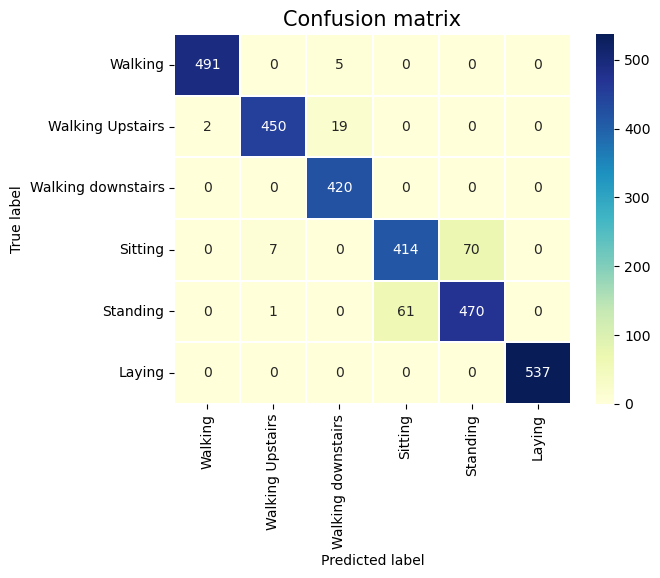

In [18]:
class_labels = ['Walking', 'Walking Upstairs', 'Walking downstairs', 'Sitting', 'Standing', 'Laying']

from sklearn.metrics import confusion_matrix

max_test = np.argmax(ytest, axis=1)
max_predictions = np.argmax(predictions, axis=1)
confusion_matrix = confusion_matrix(max_test, max_predictions)
sns.heatmap(confusion_matrix, xticklabels = class_labels, yticklabels = class_labels, annot = True, linewidths = 0.1, fmt='d', cmap = 'YlGnBu')
plt.title("Confusion matrix", fontsize = 15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()